# ST2195 Coursework

#### Student Number : 210421794

## Question 4 : Can you detect cascading failures as delays in one airport create delays in others?

In [1]:
# Import and load necessary packages

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets

flight2005 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2005.csv")
flight2006 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2006.csv")

airports = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/airports.csv")
carriers = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/carriers.csv")
plane_data = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/plane-data.csv")

In [3]:
# Combine the data from 2005 and 2006

flights = pd.concat([flight2005, flight2006])
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,NaN,0,0,0,0,0,0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,NaN,0,30,0,32,0,0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0


In [4]:
# Remove rows with missing values

flights.dropna(subset = ['DepTime', 'ArrTime', 'ArrDelay', 'DepDelay'], inplace = True)

In [5]:
# Re-check the null values

flights.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     13996639
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [6]:
# Merge between flights and airports

cf = pd.merge(flights, airports, left_on='Origin', right_on='iata', how='left')
cf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,NASDelay,SecurityDelay,LateAircraftDelay,iata,airport,city,state,country,lat,long
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,0,0,0,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,0,0,0,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,0,0,0,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,0,0,0,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,0,0,0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996635,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,0,0,0,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
13996636,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,32,0,0,SEA,Seattle-Tacoma Intl,Seattle,WA,USA,47.448982,-122.309313
13996637,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,0,0,0,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
13996638,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,0,0,0,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773


In [7]:
# Querying necessary columns to create a new DataFrame 'cf' for cascading failures analyses purposes

cf = cf[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'TailNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'LateAircraftDelay', 'airport']]
cf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,LateAircraftDelay,airport
0,2005,1,28,5,1603.0,1605,1741.0,1759,N935UA,-18.0,-2.0,BOS,ORD,0,Gen Edw L Logan Intl
1,2005,1,29,6,1559.0,1605,1736.0,1759,N941UA,-23.0,-6.0,BOS,ORD,0,Gen Edw L Logan Intl
2,2005,1,30,7,1603.0,1610,1741.0,1805,N342UA,-24.0,-7.0,BOS,ORD,0,Gen Edw L Logan Intl
3,2005,1,31,1,1556.0,1605,1726.0,1759,N326UA,-33.0,-9.0,BOS,ORD,0,Gen Edw L Logan Intl
4,2005,1,2,7,1934.0,1900,2235.0,2232,N902UA,3.0,34.0,ORD,BOS,0,Chicago O'Hare International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996635,2006,12,29,5,1246.0,1249,1452.0,1459,N905DE,-7.0,-3.0,ATL,EWR,0,William B Hartsfield-Atlanta Intl
13996636,2006,12,29,5,1225.0,1155,2033.0,1931,N651DL,62.0,30.0,SEA,ATL,0,Seattle-Tacoma Intl
13996637,2006,12,29,5,2118.0,2115,2254.0,2241,N143DA,13.0,3.0,ATL,MCO,0,William B Hartsfield-Atlanta Intl
13996638,2006,12,29,5,2122.0,2127,2209.0,2223,N904DA,-14.0,-5.0,SLC,SJC,0,Salt Lake City Intl


### Explanation

To analyze cascading failures, we will identify whether a delay in departure time of a plane will lead to delay for the next schedule of that plane. There are cascading failures if the plane departs late for its next schedule. 

We will take 3 samples to prove whether cascading failures exists or not. Here, we will use 'LateAircraftDelay' variable as it measures the amount of time by which a flight is delayed due to the previous flight's late arrival. This delay occurs because the aircraft used for the current scheduled flight is the same as the one used for the previous flight.

In [8]:
# Select rows with LateAircraftDelay between 0 and 120. We only take delays between 0 and 120 minutes as further delays might result in the following flight being canceled.
cf_lateaircraftdelay = cf.loc[(cf['LateAircraftDelay'] > 0) & (cf['LateAircraftDelay'] < 120)]

# Sort the selected rows by LateAircraftDelay in descending order
cf_lateaircraftdelay = cf_lateaircraftdelay.sort_values(by='LateAircraftDelay', ascending=False)

cf_lateaircraftdelay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,LateAircraftDelay,airport
13786127,2006,12,4,1,1559.0,1400,1800.0,1520,N664MS,160.0,119.0,EVV,ORD,119,Evansville Regional
10192107,2006,6,27,2,2316.0,2110,26.0,2227,N988AT,119.0,126.0,ATL,ICT,119,William B Hartsfield-Atlanta Intl
2055495,2005,4,7,4,2037.0,1838,2212.0,2004,N994AT,128.0,119.0,TPA,ATL,119,Tampa International
13495231,2006,12,30,6,1529.0,1315,1655.0,1450,N683,125.0,134.0,SLC,PHX,119,Salt Lake City Intl
2055293,2005,4,7,4,2048.0,1849,2336.0,2112,N934AT,144.0,119.0,FLL,BWI,119,Fort Lauderdale-Hollywood Int'l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398692,2005,6,28,2,1835.0,1755,2229.0,2202,N5FFAA,27.0,40.0,ORD,MIA,1,Chicago O'Hare International
7340218,2006,1,2,1,1622.0,1601,1715.0,1656,N639AE,19.0,21.0,DFW,GRK,1,Dallas-Fort Worth International
702390,2005,2,28,1,1635.0,1610,1840.0,1825,N305SW,15.0,25.0,TPA,BWI,1,Tampa International
13202764,2006,11,29,3,818.0,745,1048.0,1025,N935AE,23.0,33.0,ORD,SYR,1,Chicago O'Hare International


We will choose three samples randomly from above. 
The chosen three samples are :
- "Year" = 2006, "Month" = 12, "DayofMonth" = 4, "TailNum" = "N664MS"
- "Year" = 2005, "Month" = 2, "DayofMonth" = 25, "TailNum" = "N809MD"
- "Year" = 2005, "Month" = 3, "DayofMonth" = 26, "TailNum" = "N566JB"

In [9]:
# First sample

cf_N664MS = cf[(cf["Year"] == 2006) & (cf["Month"] == 12) & (cf["DayofMonth"] == 4) & (cf["TailNum"] == "N664MS")]
cf_N664MS = cf_N664MS.sort_values(by='CRSDepTime')
cf_N664MS

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,LateAircraftDelay,airport
13780051,2006,12,4,1,638.0,550,753.0,700,N664MS,53.0,48.0,STL,BNA,0,Lambert-St Louis International
13783447,2006,12,4,1,814.0,725,949.0,900,N664MS,49.0,49.0,BNA,ORD,49,Nashville International
13780079,2006,12,4,1,1139.0,955,1254.0,1040,N664MS,134.0,104.0,ORD,BMI,24,Chicago O'Hare International
13780108,2006,12,4,1,1315.0,1105,1407.0,1155,N664MS,132.0,130.0,BMI,ORD,130,Central Illinois Regional
13780724,2006,12,4,1,1439.0,1225,1535.0,1330,N664MS,125.0,134.0,ORD,EVV,123,Chicago O'Hare International
13786127,2006,12,4,1,1559.0,1400,1800.0,1520,N664MS,160.0,119.0,EVV,ORD,119,Evansville Regional
13788859,2006,12,4,1,2003.0,1710,2114.0,1830,N664MS,164.0,173.0,ORD,DSM,76,Chicago O'Hare International
13786155,2006,12,4,1,2128.0,1855,2242.0,2015,N664MS,147.0,153.0,DSM,ORD,147,Des Moines International
13784084,2006,12,4,1,2324.0,2045,148.0,2330,N664MS,138.0,159.0,ORD,GSP,128,Chicago O'Hare International


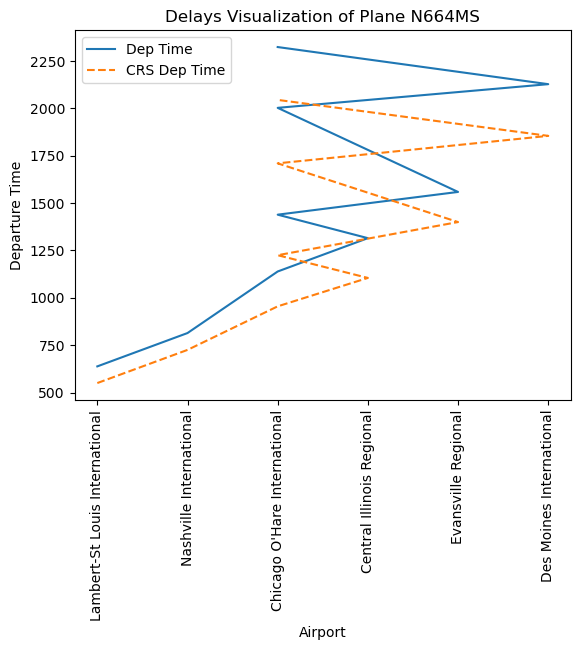

In [10]:
# Plotting a line graph for the first sample

fig, ax = plt.subplots()

ax.plot(cf_N664MS['airport'], cf_N664MS['DepTime'], label = 'Dep Time')
ax.plot(cf_N664MS['airport'], cf_N664MS['CRSDepTime'], '--', label = 'CRS Dep Time')
ax.legend()

ax.set_xlabel('Airport')
ax.set_ylabel('Departure Time')
ax.tick_params(axis='x', rotation=90)
ax.title.set_text("Delays Visualization of Plane N664MS")

plt.show()

In [11]:
# Second sample

cf_N809MD = cf[(cf["Year"] == 2005) & (cf["Month"] == 2) & (cf["DayofMonth"] == 25) & (cf["TailNum"] == "N809MD")]
cf_N809MD = cf_N809MD.sort_values(by='CRSDepTime')
cf_N809MD

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,LateAircraftDelay,airport
622432,2005,2,25,5,1118.0,1100,1310.0,1229,N809MD,41.0,18.0,DCA,DTW,0,Ronald Reagan Washington National
622603,2005,2,25,5,1333.0,1300,1442.0,1417,N809MD,25.0,33.0,DTW,DCA,25,Detroit Metropolitan-Wayne County
621044,2005,2,25,5,1531.0,1500,1654.0,1554,N809MD,60.0,31.0,DCA,PHL,7,Ronald Reagan Washington National
621534,2005,2,25,5,1832.0,1615,2005.0,1758,N809MD,127.0,137.0,PHL,STL,69,Philadelphia Intl
620145,2005,2,25,5,2042.0,1825,2340.0,2135,N809MD,125.0,137.0,STL,PHL,119,Lambert-St Louis International


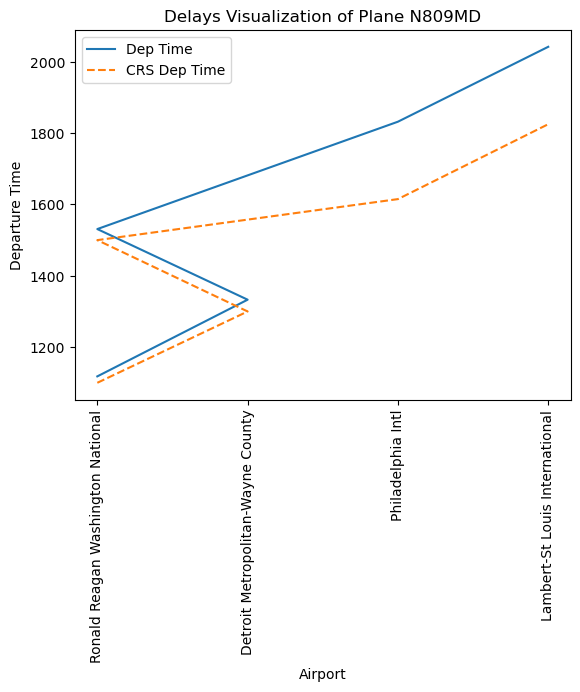

In [12]:
# Plotting a line graph for the second sample

fig, ax = plt.subplots()

ax.plot(cf_N809MD['airport'], cf_N809MD['DepTime'], label = 'Dep Time')
ax.plot(cf_N809MD['airport'], cf_N809MD['CRSDepTime'], '--', label = 'CRS Dep Time')
ax.legend()

ax.set_xlabel('Airport')
ax.set_ylabel('Departure Time')
ax.tick_params(axis='x', rotation=90)
ax.title.set_text("Delays Visualization of Plane N809MD")

plt.show()

In [13]:
# Third sample

cf_N566JB = cf[(cf["Year"] == 2005) & (cf["Month"] == 3) & (cf["DayofMonth"] == 26) & (cf["TailNum"] == "N566JB")]
cf_N566JB = cf_N566JB.sort_values(by='CRSDepTime')
cf_N566JB

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,LateAircraftDelay,airport
1635200,2005,3,26,6,837.0,840,1218.0,1140,N566JB,38.0,-3.0,JFK,FLL,0,John F Kennedy Intl
1635154,2005,3,26,6,1301.0,1220,1626.0,1500,N566JB,86.0,41.0,FLL,JFK,38,Fort Lauderdale-Hollywood Int'l
1635198,2005,3,26,6,1726.0,1540,2039.0,1840,N566JB,119.0,106.0,JFK,FLL,86,John F Kennedy Intl
1635153,2005,3,26,6,2128.0,1920,11.0,2200,N566JB,131.0,128.0,FLL,JFK,119,Fort Lauderdale-Hollywood Int'l


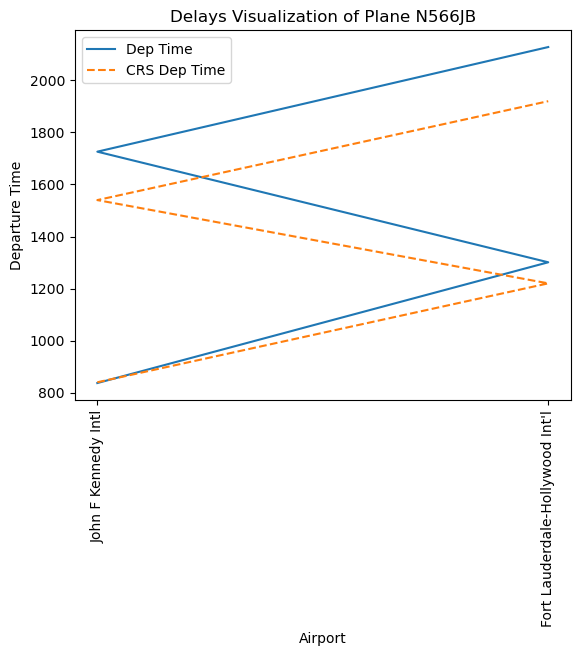

In [14]:
# Plotting a line graph for the third sample

fig, ax = plt.subplots()

ax.plot(cf_N566JB['airport'], cf_N566JB['DepTime'], label = 'Dep Time')
ax.plot(cf_N566JB['airport'], cf_N566JB['CRSDepTime'], '--', label = 'CRS Dep Time')
ax.legend()

ax.set_xlabel('Airport')
ax.set_ylabel('Departure Time')
ax.tick_params(axis='x', rotation=90)
ax.title.set_text("Delays Visualization of Plane N566JB")

plt.show()